In [1]:
%matplotlib inline

### Imports

In [74]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import os
import pandas as pd
from torchvision.io import read_image

from torch.utils.data import DataLoader

### Useful functions to retrive the data

In [15]:
# create a annotations_file.csv (img -> img, label)

def getLabelList(path):
    only_dirs = [ name for name in os.listdir(path) if 
                 os.path.isdir(os.path.join(path, name)) ]

    ret = {}
    
    for d in only_dirs:
        new_path = path + d
        index = only_dirs.index(d)
        for img in [ name for name in os.listdir(new_path)]:
            ret[img] = [img, index]
    
    return pd.Series(ret)


In [59]:
# create the pool of images (with a series that contains all the images, more deeply: img_name -> abs path, label, classes)

def getImgPool(path):
    only_dirs = [ name for name in os.listdir(path) if 
                 os.path.isdir(os.path.join(path, name)) ]

    ret = {}
    
    for d in only_dirs:
        new_path = path + d
        index = only_dirs.index(d)
        for img in [ name for name in os.listdir(new_path)]:
            abs_path = new_path + '/' + img
            ret[img] = [abs_path, index, d]
    
    return pd.Series(ret)


### Defining the custom dataset (structure that holds the data)

In [78]:
class CustomImageDataset(Dataset):
    def __init__(self, path_labels, transform=None, target_transform=None):
        self.img_labels = getLabelList(path_labels)
        self.images = getImgPool(path_labels)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_name = self.img_labels.iloc[idx][0]
        image = read_image(self.images.loc[img_name][0])
        image = image.permute(1,2,0) #made to be shown on matplotlib
        label = self.img_labels.iloc[idx][1]
        return image, label

### Creating the 2 dataset and testing

In [79]:
train_path = './data/car_brand_logos/Train/'
test_path = './data/car_brand_logos/Test/'

train_data = CustomImageDataset(path_labels=train_path, transform=ToTensor())

test_data = CustomImageDataset(path_labels=test_path, transform=ToTensor())

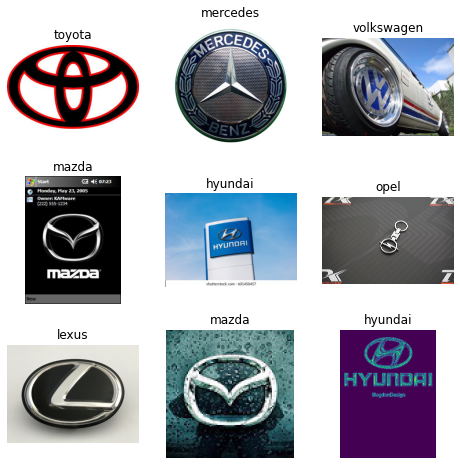

In [105]:
#testing dataset if images are loaded

only_dirs = [ name for name in os.listdir(train_path) if 
                 os.path.isdir(os.path.join(train_path, name)) ]

diz = {}
i=0
for d in only_dirs:
    diz[i] = d
    i+=1

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item() 
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(diz[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [72]:
# img, label = train_data[0]

# print(img.shape)

# print(img)

### creating dataloader (who iterate on data, create batches and shuffles it)


In [81]:
train_dl = DataLoader(train_data, batch_size=64, shuffle=True)
test_dl = DataLoader(test_data, batch_size=64, shuffle=True)

In [108]:
#dataloader test (ask a batch or a sample)

train_features, train_labels = next(iter(train_dl)) #picking a batch
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze() #picking the first img of the batch
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

RuntimeError: stack expects each tensor to be equal size, but got [281, 500, 3] at entry 0 and [556, 800, 3] at entry 1